### Importing required Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics
%matplotlib inline

### Loading Data

In [2]:
df = pd.read_csv('classified Data', index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


### Data Visualization 

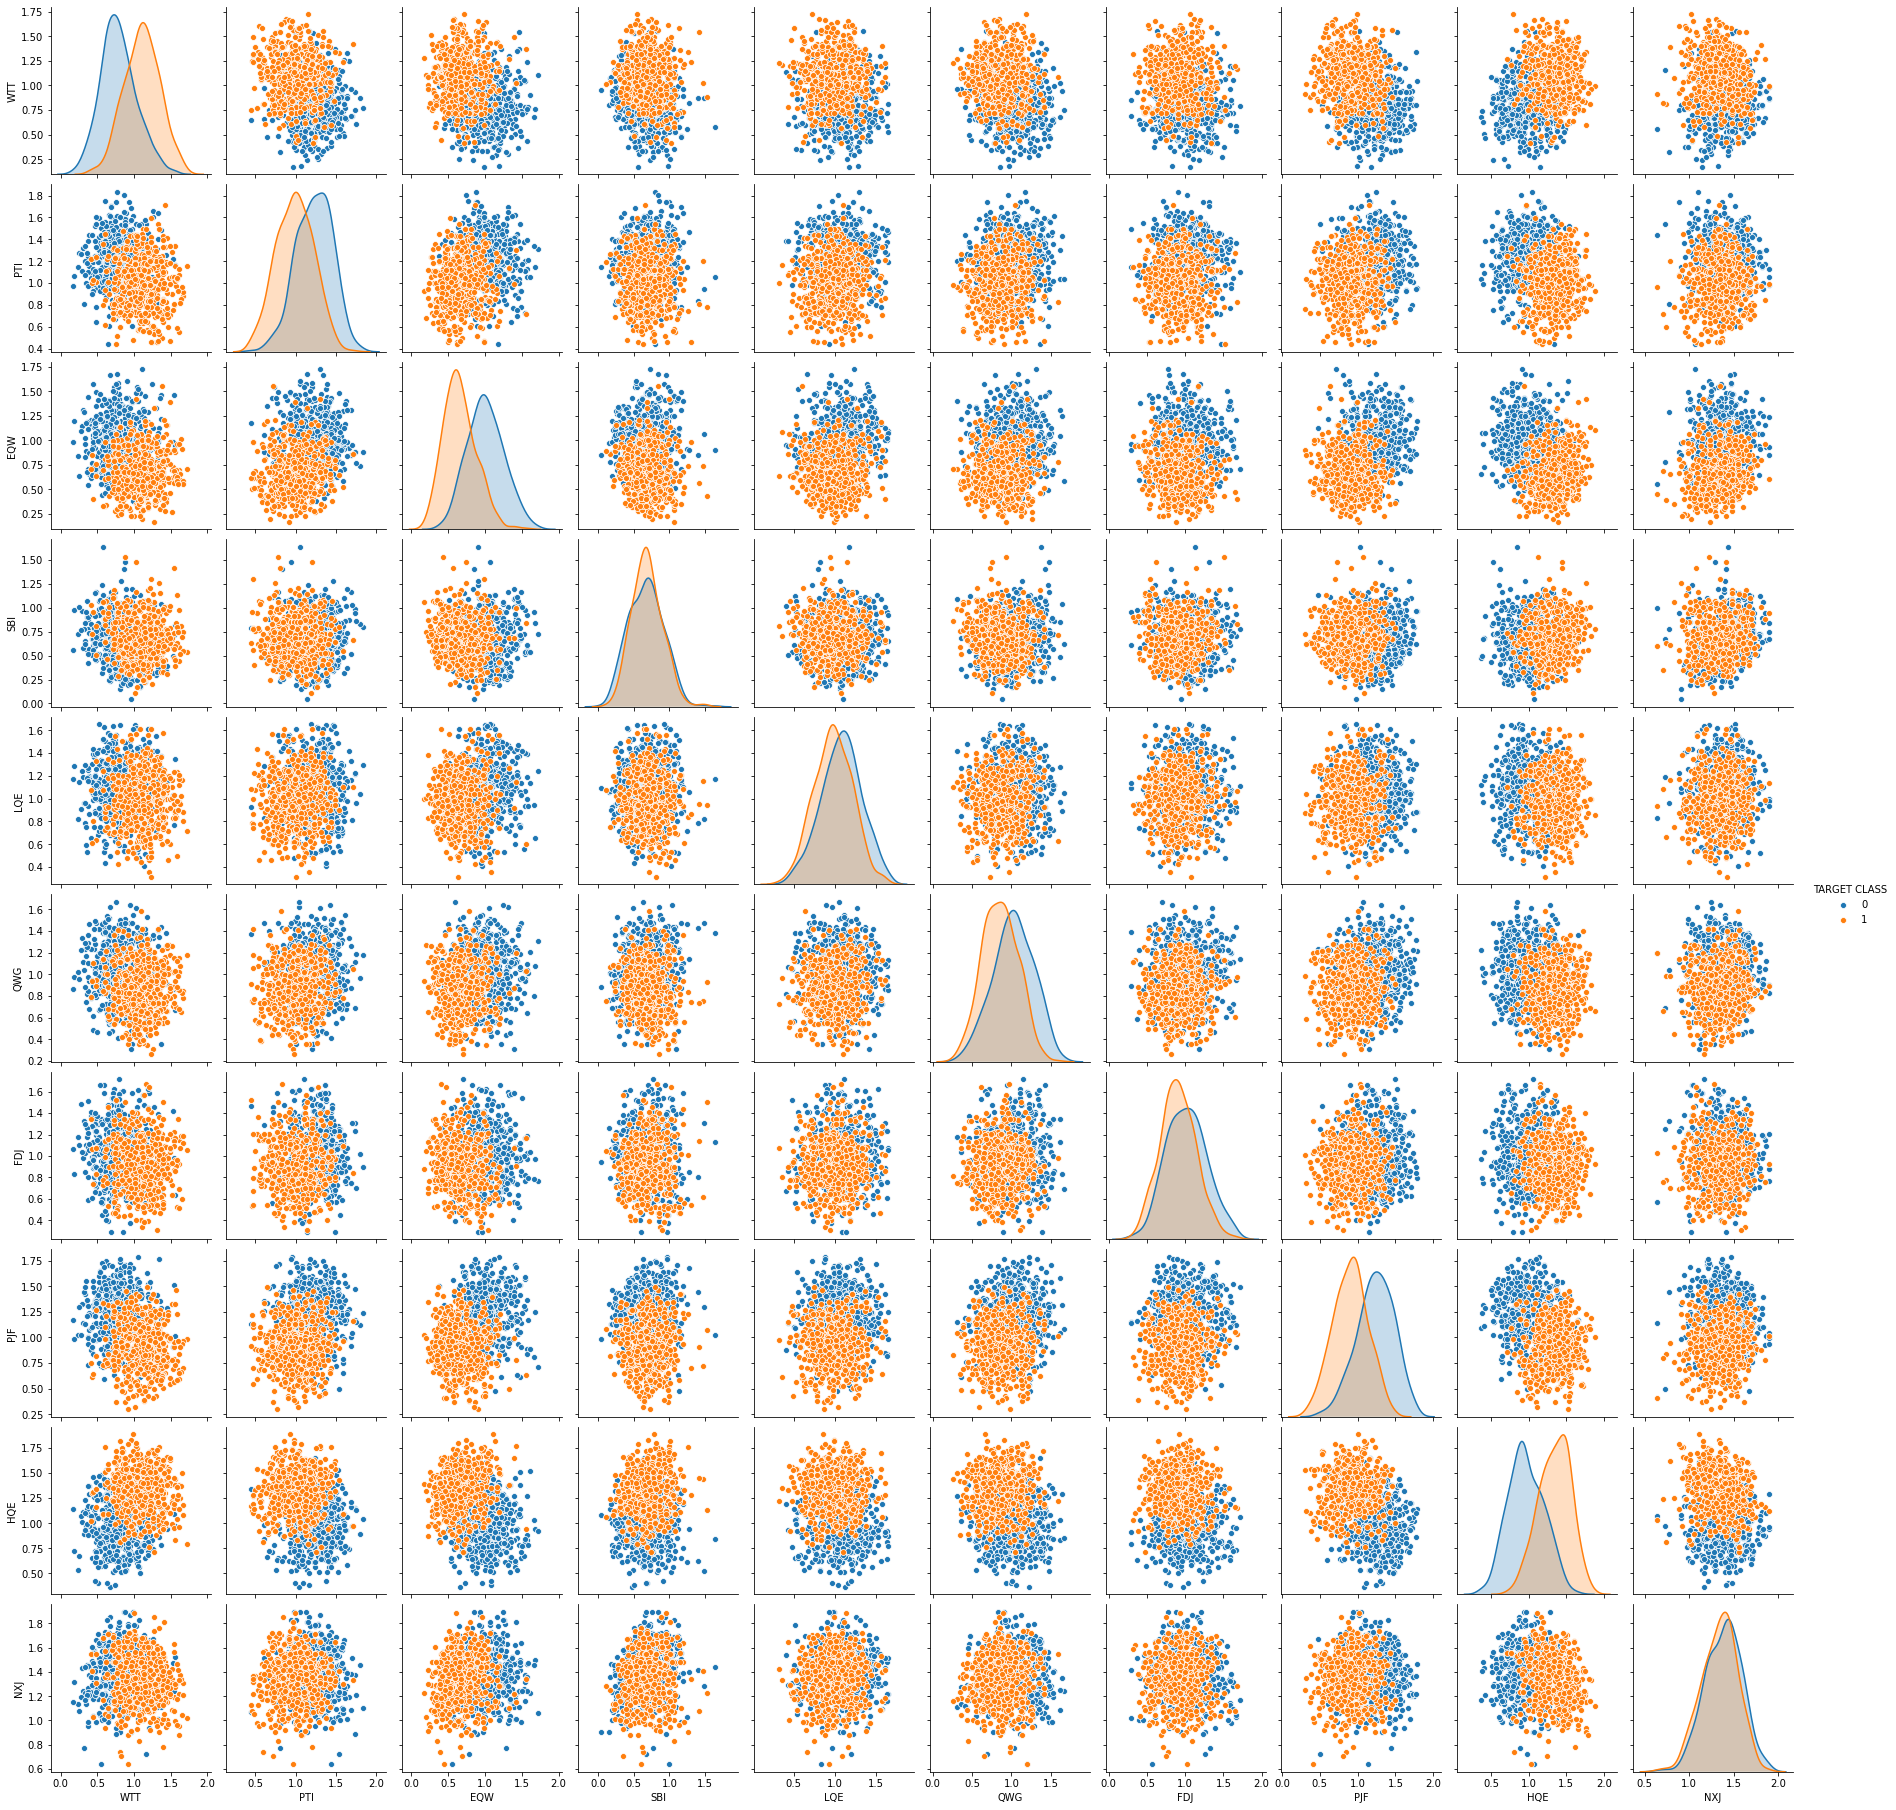

In [3]:
import seaborn as sns
sns.pairplot(df,hue='TARGET CLASS')

### Feature and Lable set

In [4]:
X = df[['WTT', 'PTI','EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF','HQE', 'NXJ']].values
Y = df['TARGET CLASS'].values

In [5]:
X[0:5]

array([[0.91391733, 1.16207271, 0.56794585, 0.7554639 , 0.78086157,
        0.35260772, 0.75969691, 0.64379756, 0.87942209, 1.23140944],
       [0.6356319 , 1.00372163, 0.53534235, 0.82564485, 0.92410893,
        0.64845024, 0.67533431, 1.01354599, 0.62155222, 1.4927016 ],
       [0.72135981, 1.20149262, 0.92198973, 0.85559498, 1.52662939,
        0.72078089, 1.62635071, 1.15448315, 0.95787702, 1.28559679],
       [1.2342044 , 1.38672629, 0.65304631, 0.82562445, 1.14250354,
        0.87512792, 1.40970806, 1.38000255, 1.52269205, 1.15309302],
       [1.27949082, 0.94974956, 0.62728004, 0.66897608, 1.2325373 ,
        0.70372744, 1.1155955 , 0.6466907 , 1.46381175, 1.41916658]])

In [6]:
Y[0:5]

array([1, 0, 0, 1, 1], dtype=int64)

### Data Normalization


In [7]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.12354188,  0.18590747, -0.91343069,  0.31962911, -1.03363681,
        -2.3083747 , -0.79895135, -1.48236813, -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333,  0.62538826, -0.44484713,
        -1.15270604, -1.12979749, -0.20224031, -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137,  0.75587279,  2.03169299,
        -0.87015616,  2.59981844,  0.28570652, -0.68249379, -0.37784986],
       [ 0.9828405 ,  1.06019327, -0.62139875,  0.62529938,  0.45282034,
        -0.26722041,  1.75020756,  1.06649052,  1.24132463, -1.02698711],
       [ 1.13927548, -0.64039191, -0.70981864, -0.05717457,  0.82288616,
        -0.93677314,  0.59678173, -1.47235164,  1.04077225,  0.2765098 ]])

### Train Test Split 

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (800, 10) (800,)
Test set: (200, 10) (200,)


### Model Classification 

In [9]:
#importing library
from sklearn.neighbors import KNeighborsClassifier

### Training, Prediction and Accuracy

##### Checking Accuracy for different K's 

In [10]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(Y_test, yhat)
mean_acc

array([0.92 , 0.895, 0.95 , 0.935, 0.93 , 0.94 , 0.94 , 0.94 , 0.93 ,
       0.935, 0.94 , 0.945, 0.95 , 0.955, 0.95 , 0.94 , 0.945, 0.95 ,
       0.945, 0.95 , 0.95 , 0.945, 0.945, 0.945, 0.935, 0.94 , 0.93 ,
       0.94 , 0.94 , 0.945, 0.94 , 0.945, 0.94 , 0.945, 0.94 , 0.945,
       0.95 , 0.95 , 0.95 ])

##### Plotting Accuracy for all K's 

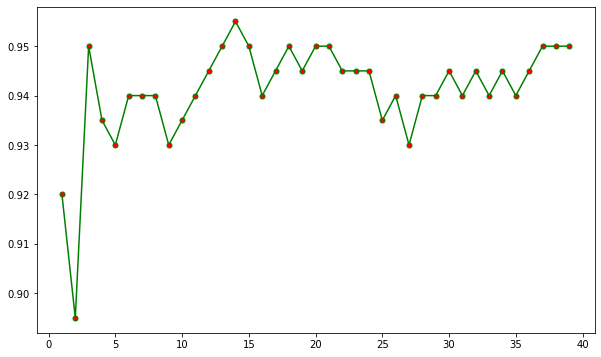

In [11]:
plt.figure(figsize=(10,6))
plt.plot(range(1,Ks),mean_acc, color='green', marker='.', markerfacecolor='red', markersize=10)

In [12]:
#Choosing best K by accuracy
print( "The Highest accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 
#Choosing worst K by accuracy
print( "The Least accuracy was with", mean_acc.min(), "with k=", mean_acc.argmin()+1) 

The Highest accuracy was with 0.955 with k= 14
The Least accuracy was with 0.895 with k= 2
